1в) Выделение границы связной области. На вход подается изображение. Граница связной области задается одним цветом. Имея начальную точку границы организовать ее обход, занося точки в список в порядке обхода. Начальную точку границы можно получать любым способом. Для контроля полученную границу прорисовать поверх исходного изображения.

In [8]:
%matplotlib inline


In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img1 = Image.open('image1.jpg')
img1 = img1.convert("RGB")
arr1 = np.array(img1)
img2 = Image.open('image2.jpg')
img2 = img2.convert("RGB")
arr2 = np.array(img2)
img3 = Image.open('image3.jpg')
img3 = img3.convert("RGB")
arr3 = np.array(img3)
img4 = Image.open('image4.jpg')
img4 = img4.convert("RGB")
arr4 = np.array(img4)
img5 = Image.open('image5.jpg')
img5 = img5.convert("RGB")
arr5 = np.array(img5)




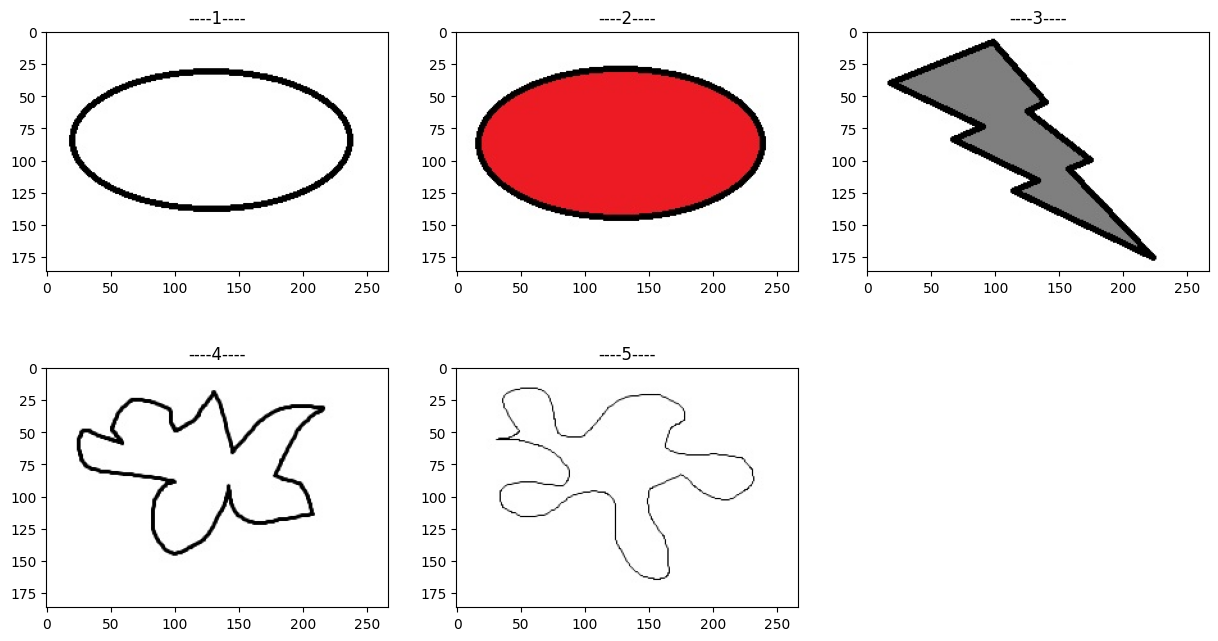

In [10]:

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

axes[0, 0].imshow(img1)
axes[0, 0].set_title('----1----')
axes[0, 1].imshow(img2) 
axes[0, 1].set_title('----2----')
axes[0, 2].imshow(img3)
axes[0, 2].set_title('----3----')
axes[1, 0].imshow(img4) 
axes[1, 0].set_title('----4----')
axes[1, 1].imshow(img5) 
axes[1, 1].set_title('----5----')
axes[1, 2].axis('off')
plt.show()

In [11]:
from ipywidgets.widgets import Dropdown,Output,VBox

from IPython.display import display, clear_output

image_arrays = { '1': arr1, '2': arr2, '3': arr3, '4': arr4, '5': arr5, } 


dropdown_numbers = Dropdown(
    options=list(image_arrays.keys()),
    value='1',
    description='Выберите номер изображения:',
    disabled=False,
)
output_plot_widget = Output()

current_figure = None
current_axes = None

def onclick(event):
    global current_image_data
    if event.inaxes and current_image_data is not None:
        x, y = event.xdata, event.ydata
        radius = 1000 # Задайте желаемый радиус круга
        color = (1, 0, 0) # Красный цвет круга (RGB)

        # Создаем круг
        circle = plt.Circle((x, y), radius, color=color, fill=False, linewidth=2)
        current_axes.add_patch(circle)
        current_figure.canvas.draw_idle()

def display_selected_image_mpl(change):
    selected_number_str = change['new']
    image = image_arrays.get(selected_number_str)

    # Используем with output_plot_widget: для вывода в виджет
    with output_plot_widget:
        global current_axes, current_figure
        clear_output(wait=True) # Очищаем предыдущий вывод перед отрисовкой нового
        fig, ax = plt.subplots(figsize=(8, 8)) # Создаем фигуру и оси
        ax.imshow(image)
        ax.set_title(f"Изображение {selected_number_str}")
        ax.axis('off')

        current_figure = fig
        current_axes = ax

        # Подключаем обработчик события клика мыши
        fig.canvas.mpl_connect('button_press_event', onclick)

        plt.show() # plt.show() теперь будет отображать в output_plot_widget

dropdown_numbers.observe(display_selected_image_mpl, names='value')

# Первоначальный вывод изображения
display_selected_image_mpl({'new': dropdown_numbers.value})

# Отображаем виджеты
display(VBox([dropdown_numbers, output_plot_widget]))

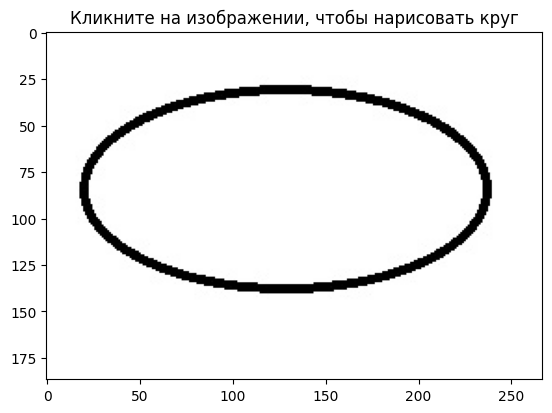

In [12]:

import matplotlib.patches as patches

# Глобальная переменная для хранения осей, чтобы можно было добавлять круги
ax = None
# Глобальная переменная для хранения объекта изображения, чтобы его можно было обновлять
im = None

def onclick(event):
    global ax, im
    if event.inaxes:
        # event.xdata и event.ydata - координаты клика в данных осей
        center_x, center_y = int(event.xdata), int(event.ydata)
        print(f"Клик в координатах: x={event.xdata:.2f}, y={event.ydata:.2f}")
        # Определяем радиус круга. Можно сделать его фиксированным или зависящим от чего-то.
        radius = 20

        # Создаем объект круга
        # Обратите внимание: matplotlib ожидает (x, y, width, height) для прямоугольника,
        # из которого вырезается круг. Для круга мы используем Ellipse,
        # где center=(x, y) и width=height=2*radius.
        circle = patches.Circle((center_x, center_y), radius, edgecolor='red', facecolor='none', linewidth=2)

        # Добавляем круг на оси
        ax.add_patch(circle)

        # Перерисовываем холст, чтобы увидеть изменения
        plt.draw()

fig, ax = plt.subplots(1)
ax.imshow(img1)
ax.set_title("Кликните на изображении, чтобы нарисовать круг")

# Сохраняем ссылку на объект изображения для потенциального обновления (хотя в данном случае это не нужно)
im = ax.imshow(img1)

# Подключаем обработчик событий мыши
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Задание 3. Выполнить градиентное окрашивание произвольного треугольника, у которого все три вершины разного цвета, используя алгоритм растеризации треугольника.

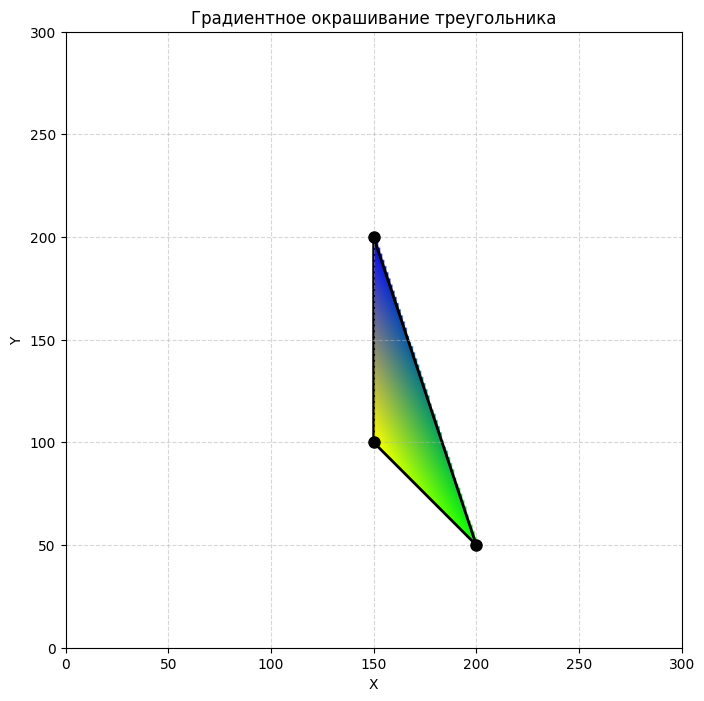

In [ ]:
from matplotlib.patches import Polygon

# Вершины в виде (x, y)
vertices = np.array([
    [150, 100],  
    [200, 50],  
    [150, 200] 
])

# Цвета в формате RGB (от 0 до 1)
colors = np.array([
    [1.0, 1.0, 0.0],  
    [0.0, 1.0, 0.0],  
    [0.0, 0.0, 1.0]   
])

def get_barycentric_coords(p, v1, v2, v3):
    """
    Вычисляет барицентрические координаты точки p относительно треугольника (v1, v2, v3).
    Возвращает None, если точка не внутри треугольника.
    """
    v1 = np.array(v1)
    v2 = np.array(v2)
    v3 = np.array(v3)
    p = np.array(p)

    # Векторы сторон треугольника
    vec_v2_v1 = v2 - v1
    vec_v3_v1 = v3 - v1
    vec_p_v1 = p - v1

    # Вычисляем знаменатель для барицентрических координат
    # Это удвоенная площадь треугольника
    denom = (vec_v2_v1[0] * vec_v3_v1[1] - vec_v3_v1[0] * vec_v2_v1[1])

    # Если знаменатель равен нулю, треугольник вырожденный (вершины лежат на одной прямой)
    if np.abs(denom) < 1e-9:
        return None

    lambda_2 = (vec_p_v1[0] * vec_v3_v1[1] - vec_v3_v1[0] * vec_p_v1[1]) / denom
    lambda_3 = (vec_v2_v1[0] * vec_p_v1[1] - vec_p_v1[0] * vec_v2_v1[1]) / denom
    lambda_1 = 1.0 - lambda_2 - lambda_3

    if 0 <= lambda_1 <= 1 and 0 <= lambda_2 <= 1 and 0 <= lambda_3 <= 1:
        return np.array([lambda_1, lambda_2, lambda_3])
    else:
        return None

# --- Алгоритм растеризации ---

# Определяем границы изображения
img_width = 300
img_height = 300

framebuffer = np.ones((img_height, img_width, 3))

# Находим ограничивающий прямоугольник (bounding box)
min_x = int(np.min(vertices[:, 0]))
max_x = int(np.max(vertices[:, 0]))
min_y = int(np.min(vertices[:, 1]))
max_y = int(np.max(vertices[:, 1]))

# Для удобства, убедимся, что границы не выходят за пределы framebuffer
min_x = max(0, min_x)
max_x = min(img_width - 1, max_x)
min_y = max(0, min_y)
max_y = min(img_height - 1, max_y)


# Перебираем пиксели в ограничивающем прямоугольнике
for y in range(min_y, max_y + 1):
    for x in range(min_x, max_x + 1):
        p = np.array([x, y])

        bary_coords = get_barycentric_coords(p, vertices[0], vertices[1], vertices[2])

        if bary_coords is not None:
            interpolated_color = (
                bary_coords[0] * colors[0] +
                bary_coords[1] * colors[1] +
                bary_coords[2] * colors[2]
            )
            interpolated_color = np.clip(interpolated_color, 0, 1)
            framebuffer[y, x] = interpolated_color

plt.figure(figsize=(8, 8))
plt.imshow(framebuffer, origin='lower', extent=[0, img_width, 0, img_height])
triangle = Polygon(vertices, closed=True, fill=None, edgecolor='black', linewidth=2)
plt.gca().add_patch(triangle)

# Отмечаем вершины
plt.plot(vertices[:, 0], vertices[:, 1], 'o', color='black', markersize=8)

plt.title("Градиентное окрашивание треугольника")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, img_width)
plt.ylim(0, img_height)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_aspect('equal', adjustable='box') # Делаем оси равными
plt.show()